In [3]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
model = CmdStanModel(stan_file='stan1.stan')

INFO:cmdstanpy:compiling stan file C:\Users\TOSHIBA\Desktop\CPS\Semester 1\Data analysis\Lab3\Ex1\stan1.stan to exe file C:\Users\TOSHIBA\Desktop\CPS\Semester 1\Data analysis\Lab3\Ex1\stan1.exe
INFO:cmdstanpy:compiled model executable: C:\Users\TOSHIBA\Desktop\CPS\Semester 1\Data analysis\Lab3\Ex1\stan1.exe


In [5]:
result = model.sample(data={'N':1, 'y':[1]}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [6]:
print(result.diagnose())

Processing csv files: C:\Users\TOSHIBA\AppData\Local\Temp\tmpcn3pc8dp\stan1-20220315112101_1.csv, C:\Users\TOSHIBA\AppData\Local\Temp\tmpcn3pc8dp\stan1-20220315112101_2.csv, C:\Users\TOSHIBA\AppData\Local\Temp\tmpcn3pc8dp\stan1-20220315112101_3.csv, C:\Users\TOSHIBA\AppData\Local\Temp\tmpcn3pc8dp\stan1-20220315112101_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
256 of 4000 (6.40%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



In [7]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

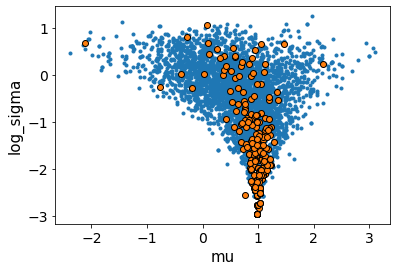

In [8]:
#Arviz plot
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

###  In first one we have geometry and less parameter which makes more parameters
### divergent, which is visualized by orange dots 

# Variant B


In [9]:
model = CmdStanModel(stan_file='stan1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [10]:
result = model.sample(data={'N':5, 'y':[1.05, 0.87, -0.49, -0.22, 0.18]}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [11]:
print(result.diagnose())

Processing csv files: C:\Users\TOSHIBA\AppData\Local\Temp\tmpcn3pc8dp\stan1-20220315112329_1.csv, C:\Users\TOSHIBA\AppData\Local\Temp\tmpcn3pc8dp\stan1-20220315112329_2.csv, C:\Users\TOSHIBA\AppData\Local\Temp\tmpcn3pc8dp\stan1-20220315112329_3.csv, C:\Users\TOSHIBA\AppData\Local\Temp\tmpcn3pc8dp\stan1-20220315112329_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



In [13]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

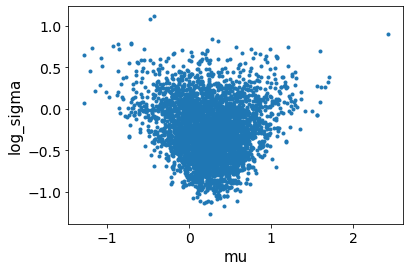

In [14]:
#Arviz plot
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

### in second one we have more params and not specified geometry of the space 
### where we are looking for data
